In [2]:
import os
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)

rcParams['figure.dpi']= 200
rcParams['figure.figsize']= 4.5,3

In [80]:
np.loadtxt('./test_data').shape

(195, 32)

In [77]:
np.loadtxt('./prediction_test').reshape(-1,15,32)

array([[[ 8.55003566e-02, -4.42164947e-02, -1.41915339e-01, ...,
          1.45718217e-01,  1.45092596e-01,  1.41326388e-01],
        [ 1.17537138e-01,  1.00777928e-01,  6.26600556e-02, ...,
         -4.73805314e-01, -4.13821066e-01, -3.59614949e-01],
        [-3.07682484e-01, -2.58417154e-01, -2.11459145e-01, ...,
         -7.37910780e-01, -7.38736671e-01, -7.21565159e-01],
        ...,
        [-7.07652419e-02, -7.62105686e-02, -6.41988661e-02, ...,
          7.14720156e-02,  7.92281052e-02,  7.75847162e-02],
        [ 8.50906050e-02,  9.12515669e-02,  9.27420169e-02, ...,
         -2.26357940e-01, -2.52502208e-01, -2.64330411e-01],
        [-2.60824686e-01, -2.70061258e-01, -2.81384503e-01, ...,
          1.09169436e-01,  1.03883183e-01,  9.81276968e-02]],

       [[ 7.97711326e-02,  3.65365007e-02,  8.99040126e-03, ...,
          7.60207236e-01,  8.13293399e-01,  8.38218199e-01],
        [ 8.45310275e-01,  8.49301574e-01,  8.49018881e-01, ...,
         -4.48801497e-01, -4.50295079e

In [79]:
np.loadtxt('./test_target').shape

(195, 480)

In [75]:
np.loadtxt('./test_data').shape

(195, 32)

In [125]:
for target in range(195):
    print(target,"Multi",np.mean((np.loadtxt('./prediction_test')[target] - np.loadtxt('./test_target')[target])**2))
    print(target,"MAML",np.mean((np.loadtxt('./prediction_maml')[target] - np.loadtxt('./test_target')[target])**2))

0 Multi 0.002456676410881466
0 MAML 0.0023673197343783703
1 Multi 0.0020098468545314816
1 MAML 0.002404351421470777
2 Multi 0.000461463821797062
2 MAML 0.0012414626959105775
3 Multi 0.003796756668219803
3 MAML 0.0036802245802803487
4 Multi 0.0006404032151949033
4 MAML 0.001562278406334383
5 Multi 0.03417273014522379
5 MAML 0.023073043537822555
6 Multi 0.005653876434395405
6 MAML 0.004506949311186569
7 Multi 0.007411022703845848
7 MAML 0.0047625224046816215
8 Multi 0.0007032976895962502
8 MAML 0.0014323150626515708
9 Multi 0.00038403817274988564
9 MAML 0.0008533462837342673
10 Multi 0.0012471950926795595
10 MAML 0.001610934584162182
11 Multi 0.0005228400989728712
11 MAML 0.0013836202276011496
12 Multi 0.0003663258312942736
12 MAML 0.000863850419152289
13 Multi 0.0028265308439085323
13 MAML 0.0025803257888267987
14 Multi 0.0008068598499931943
14 MAML 0.00120665086287459
15 Multi 0.0015471853834853977
15 MAML 0.003213005469056645
16 Multi 0.0012155177613544788
16 MAML 0.002121164996032423

135 MAML 0.0036450680991589545
136 Multi 0.0011549661723849252
136 MAML 0.001766509006884839
137 Multi 0.0007832470608938614
137 MAML 0.0009762328925238927
138 Multi 0.006958106036605963
138 MAML 0.005449536894052976
139 Multi 0.009398789684856098
139 MAML 0.006971072431621882
140 Multi 0.0019268509994809515
140 MAML 0.002027053914777074
141 Multi 0.0005850923631143325
141 MAML 0.001030500077216153
142 Multi 0.0019016499292420128
142 MAML 0.0020084448806867105
143 Multi 0.0036736074758115375
143 MAML 0.0039296459139724115
144 Multi 0.0035478643763366957
144 MAML 0.003755174558974941
145 Multi 0.03473624441865026
145 MAML 0.02206830919510177
146 Multi 0.0012597808020214012
146 MAML 0.0014638557647467074
147 Multi 0.13452196114933052
147 MAML 0.10170789013075446
148 Multi 0.004227185023967268
148 MAML 0.005559014005527677
149 Multi 0.01267404554761801
149 MAML 0.007927960476281078
150 Multi 0.0018489012674319531
150 MAML 0.002099874332046436
151 Multi 0.0006797989128620087
151 MAML 0.001

In [138]:
target = 139

Text(0.5, 1.0, 'Example from target test of Multitask')

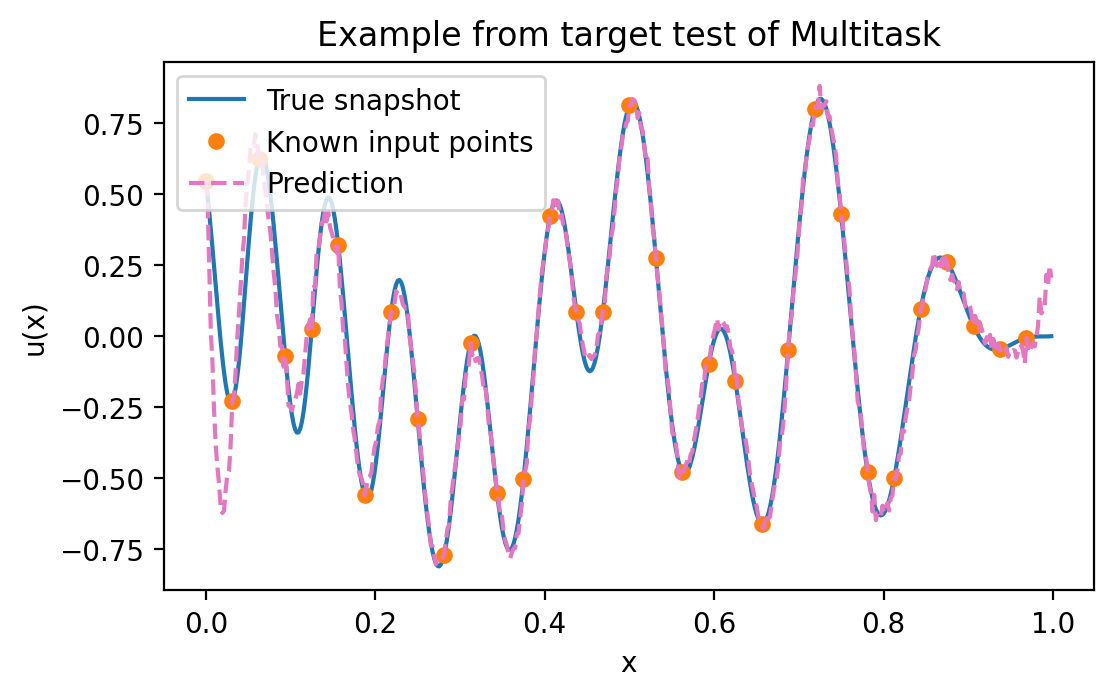

In [139]:
plt.figure(figsize=(6,3.5))
plt.plot(np.arange(512)/512,np.hstack((np.loadtxt('./test_data')[target].reshape(32,1),
                    np.loadtxt('./test_target')[target].reshape(32,15))).reshape(-1))
plt.plot(np.arange(0,512,16)/512,np.loadtxt('./test_data')[target],'.',markersize=10)

plt.plot(np.arange(512)/512,np.hstack((np.loadtxt('./test_data')[target].reshape(32,1),
                    np.loadtxt('./prediction_test')[target].reshape(32,15))).reshape(-1),'C6--')
plt.legend(['True snapshot','Known input points','Prediction'])
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Example from target test of Multitask')

Text(0.5, 1.0, 'Example from target test of MAML')

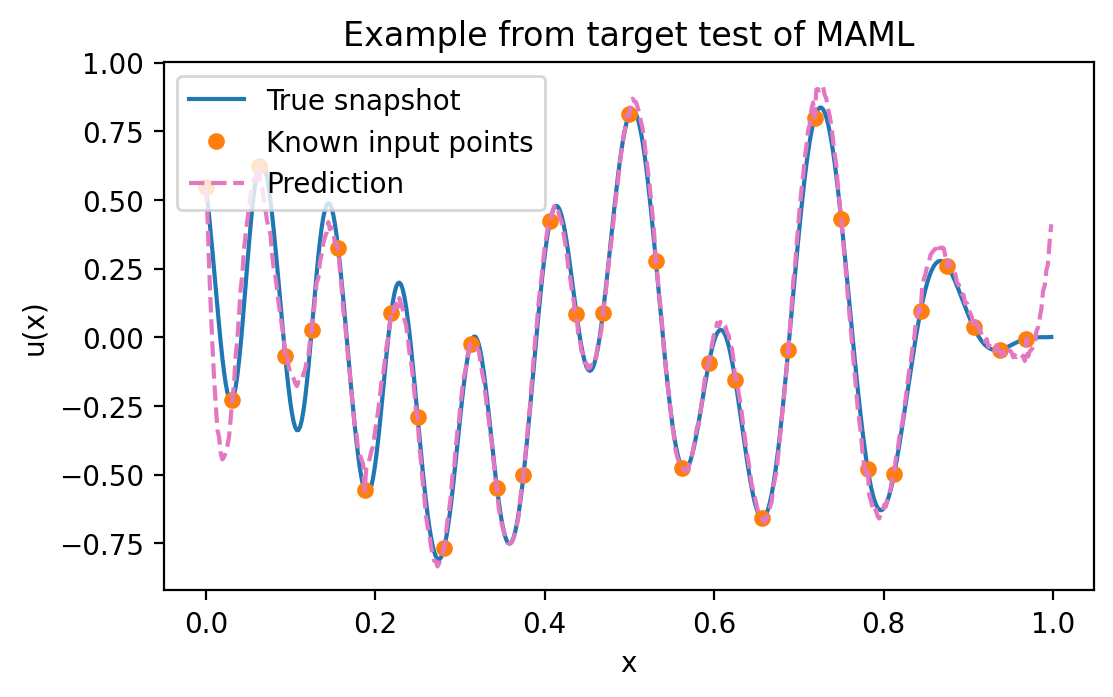

In [140]:
plt.figure(figsize=(6,3.5))
plt.plot(np.arange(512)/512,np.hstack((np.loadtxt('./test_data')[target].reshape(32,1),
                    np.loadtxt('./test_target')[target].reshape(32,15))).reshape(-1))
plt.plot(np.arange(0,512,16)/512,np.loadtxt('./test_data')[target],'.',markersize=10)

plt.plot(np.arange(512)/512,np.hstack((np.loadtxt('./test_data')[target].reshape(32,1),
                    np.loadtxt('./prediction_maml')[target].reshape(32,15))).reshape(-1),'C6--')
plt.legend(['True snapshot','Known input points','Prediction'])
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Example from target test of MAML')

In [42]:
string_meta = """step:  100 train loss  0.003127351208250024 test loss:  0.019711353038540155
step:  200 train loss  0.002041661326796561 test loss:  0.017964298997819265
step:  300 train loss  0.0017145432176570669 test loss:  0.013487171025956689
step:  400 train loss  0.0008946643700155499 test loss:  0.011159206405143033
step:  500 train loss  0.001458973276114447 test loss:  0.011232469229983272
step:  600 train loss  0.0018117190266836137 test loss:  0.010217849768343988
step:  700 train loss  0.001315580008301999 test loss:  0.009108070383453775
step:  800 train loss  0.0017013518118766994 test loss:  0.008816244946401812
step:  900 train loss  0.0012543765692240713 test loss:  0.008264931931961822
step:  1000 train loss  0.0007173080751241907 test loss:  0.008111468819773104
step:  1100 train loss  0.0012355101791207928 test loss:  0.008396974343209612
step:  1200 train loss  0.0012463905529305722 test loss:  0.008961682531531267
step:  1300 train loss  0.0008743716517185028 test loss:  0.0077051679790064624
step:  1400 train loss  0.000410012785088457 test loss:  0.006897861750457308
step:  1500 train loss  0.00043990185528380735 test loss:  0.0067821791320006215
step:  1600 train loss  0.0006779842634268748 test loss:  0.007167457303575704
step:  1700 train loss  0.0011552700594271278 test loss:  0.007592607772463576
step:  1800 train loss  0.0007931554914140163 test loss:  0.007362105049451733
step:  1900 train loss  0.0009516538450992843 test loss:  0.0068726095944432655
step:  2000 train loss  0.0006077090574445181 test loss:  0.006793289092933322
step:  2100 train loss  0.0006199609736931706 test loss:  0.006451440693404792
step:  2200 train loss  0.0009211937890654275 test loss:  0.007280309209301609
step:  2300 train loss  0.001518363938398457 test loss:  0.007126301042041239
step:  2400 train loss  0.000580454333052356 test loss:  0.006759895954615142
step:  2500 train loss  0.0010682948304350298 test loss:  0.006728194834753036
step:  2600 train loss  0.0004902236644812748 test loss:  0.006479078715319607
step:  2700 train loss  0.0008989119952406715 test loss:  0.006590111687430602
step:  2800 train loss  0.0008073261312542071 test loss:  0.00759451529559592
step:  2900 train loss  0.0014724976038115378 test loss:  0.007193911096789628
step:  3000 train loss  0.0004154162845693858 test loss:  0.006178159867857113
step:  3100 train loss  0.0005185445287721058 test loss:  0.006078853100008901
step:  3200 train loss  0.00034651905042382505 test loss:  0.006096391882733652
step:  3300 train loss  0.0007025156072380802 test loss:  0.006574514474753123
step:  3400 train loss  0.0010461209970401388 test loss:  0.007353115523042514
step:  3500 train loss  0.001221443534753776 test loss:  0.010288044502166313
step:  3600 train loss  0.0009734727419190972 test loss:  0.006943268843966017
step:  3700 train loss  0.00046487605984121654 test loss:  0.005772857108688659
step:  3800 train loss  0.0004282510267013066 test loss:  0.005783823362860709
step:  3900 train loss  0.0003844556451070323 test loss:  0.005748659685910606
step:  4000 train loss  0.0003559539798729271 test loss:  0.005758203029583437
step:  4100 train loss  0.00038322958585785747 test loss:  0.005871087837883073
step:  4200 train loss  0.00044430957195499643 test loss:  0.0060693437807158804
step:  4300 train loss  0.00051315787056454 test loss:  0.006246567022527246
step:  4400 train loss  0.000474039316817212 test loss:  0.006179503726594529
step:  4500 train loss  0.00043320994610130715 test loss:  0.0060475848811041505
step:  4600 train loss  0.0004609691105272051 test loss:  0.006107560194940686
step:  4700 train loss  0.0005488372048722067 test loss:  0.006335888378422769
step:  4800 train loss  0.0005959079595794829 test loss:  0.00648303185707221
step:  4900 train loss  0.0005835075378748753 test loss:  0.006373995858918464
step:  5000 train loss  0.0005934993638981401 test loss:  0.006169710505420744
"""

(-0.002, 0.02)

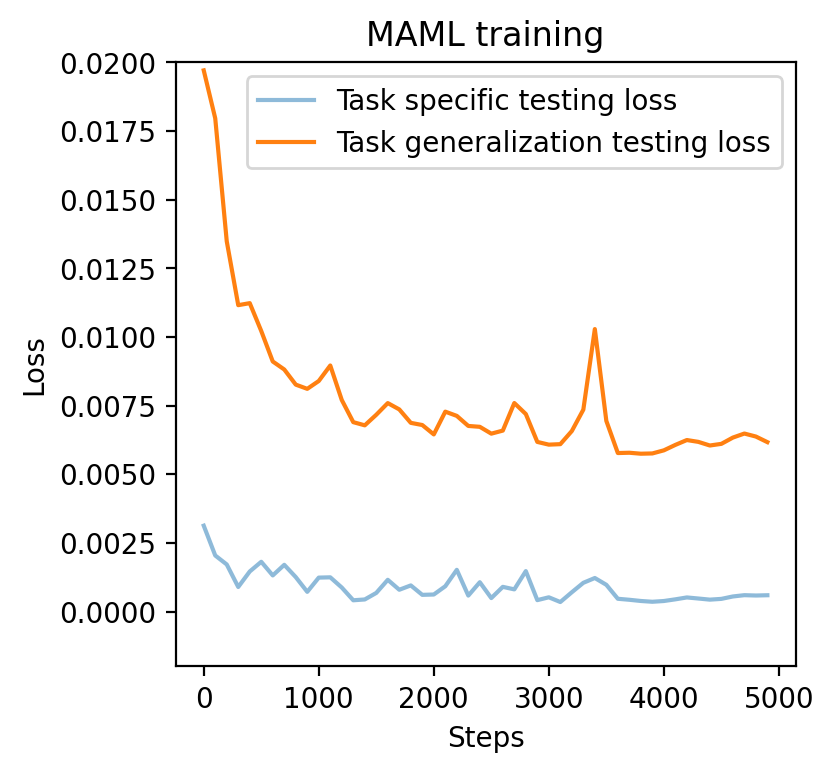

In [73]:
plt.figure(figsize=(4,4))
plt.plot(np.arange(1,5001,100),[float(i) for i in string_meta.split()[4::8]],alpha = 0.5)
plt.plot(np.arange(1,5001,100),[float(i) for i in string_meta.split()[7::8]],alpha = 0.99)
plt.legend(['Task specific testing loss','Task generalization testing loss'])
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('MAML training')
plt.ylim(-0.002,0.02)

In [59]:
string_multi = """step:  100 train loss  0.006300968988025881 test loss:  0.041156099833548926
step:  200 train loss  0.0030717060794684474 test loss:  0.026632178750498
step:  300 train loss  0.0012169121111068883 test loss:  0.0204942423143239
step:  400 train loss  0.0008208574110981217 test loss:  0.016058422540893597
step:  500 train loss  0.0009327710488502897 test loss:  0.01394294511033081
step:  600 train loss  0.00051516933096083 test loss:  0.012317181602804669
step:  700 train loss  0.0004221497322833892 test loss:  0.0114864594095445
step:  800 train loss  0.0005541172128720636 test loss:  0.011030450069911346
step:  900 train loss  0.0008652885737967356 test loss:  0.0109930759489835
step:  1000 train loss  0.0005824715834837154 test loss:  0.010043792203074546
step:  1100 train loss  0.00035309105790768135 test loss:  0.009528424111347604
step:  1200 train loss  0.00037326685047028374 test loss:  0.009261292837974305
step:  1300 train loss  0.0005047953688746259 test loss:  0.009115914010496802
step:  1400 train loss  0.0006067408598914094 test loss:  0.00908129928960027
step:  1500 train loss  0.001053304128381644 test loss:  0.009162713378587319
step:  1600 train loss  0.00034614999251045774 test loss:  0.008479545394126237
step:  1700 train loss  0.0005068128295957346 test loss:  0.008470159599416237
step:  1800 train loss  0.0005699668743618365 test loss:  0.008361449644291852
step:  1900 train loss  0.0003712196224711392 test loss:  0.008136810614019564
step:  2000 train loss  0.0003930625580415314 test loss:  0.00807303402604577
step:  2100 train loss  0.0004969878791532765 test loss:  0.008080261750373796
step:  2200 train loss  0.0005128263273855837 test loss:  0.008020182420510221
step:  2300 train loss  0.0004269090736393488 test loss:  0.007881650145273537
step:  2400 train loss  0.0004499492214442945 test loss:  0.007825827310218355
step:  2500 train loss  0.00048177199683330517 test loss:  0.007779005833012027
step:  2600 train loss  0.00038862154932107167 test loss:  0.007635735939650964
step:  2700 train loss  0.00035081661274537944 test loss:  0.0075476458947478856
step:  2800 train loss  0.0004387778208015493 test loss:  0.007572425938734916
step:  2900 train loss  0.0005866322571663207 test loss:  0.00764573983731436
step:  3000 train loss  0.0004983581150154452 test loss:  0.0075473669336736954
step:  3100 train loss  0.00036699926648392283 test loss:  0.007436346615746872
step:  3200 train loss  0.00036011468960509175 test loss:  0.007402610580247561
step:  3300 train loss  0.00035758811005652243 test loss:  0.007377201956651449
step:  3400 train loss  0.0003915498632542589 test loss:  0.007394315581287384
step:  3500 train loss  0.00047816728196302063 test loss:  0.007478931154381186
step:  3600 train loss  0.0005224399398323144 test loss:  0.007532686385025587
step:  3700 train loss  0.0004493193724803049 test loss:  0.007445511312826355
step:  3800 train loss  0.0003843930605091168 test loss:  0.007341401224352874
step:  3900 train loss  0.00035414938376585373 test loss:  0.007285050569654354
step:  4000 train loss  0.0004041753802878543 test loss:  0.007293110536507984
step:  4100 train loss  0.0004770671691699401 test loss:  0.007346590951761833
step:  4200 train loss  0.0005170508113743268 test loss:  0.007414361675414832
step:  4300 train loss  0.0004571604490713188 test loss:  0.007396105119163214
step:  4400 train loss  0.0004014058774645635 test loss:  0.007323542968121004
step:  4500 train loss  0.0003483018124212816 test loss:  0.007250255573833635
step:  4600 train loss  0.0003302011887059693 test loss:  0.007218779101471322
step:  4700 train loss  0.00038398821604119983 test loss:  0.007235299304372065
step:  4800 train loss  0.00047404346182144746 test loss:  0.0072941893007351976
step:  4900 train loss  0.0005199614713628433 test loss:  0.007372941841535983
step:  5000 train loss  0.0004528175029198075 test loss:  0.007363400007120974"""

(-0.002, 0.02)

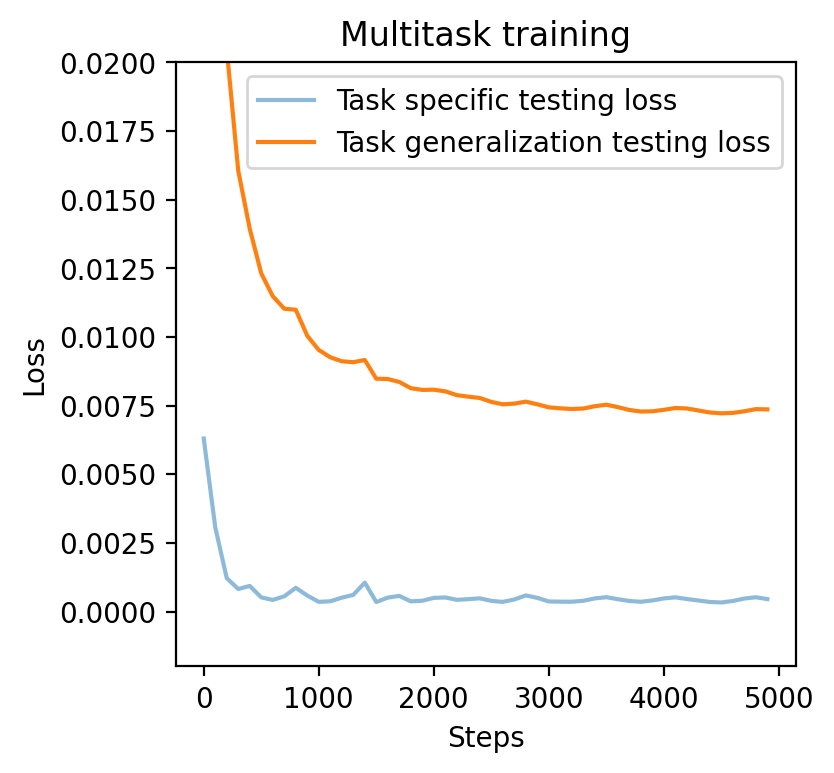

In [72]:
plt.figure(figsize=(4,4))
plt.plot(np.arange(1,5001,100),[float(i) for i in string_multi.split()[4::8]],alpha = 0.5)
plt.plot(np.arange(1,5001,100),[float(i) for i in string_multi.split()[7::8]],alpha = 0.99)
plt.legend(['Task specific testing loss','Task generalization testing loss'])
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Multitask training')
plt.ylim(-0.002,0.02)

Text(0.5, 1.0, 'Task specific testing loss')

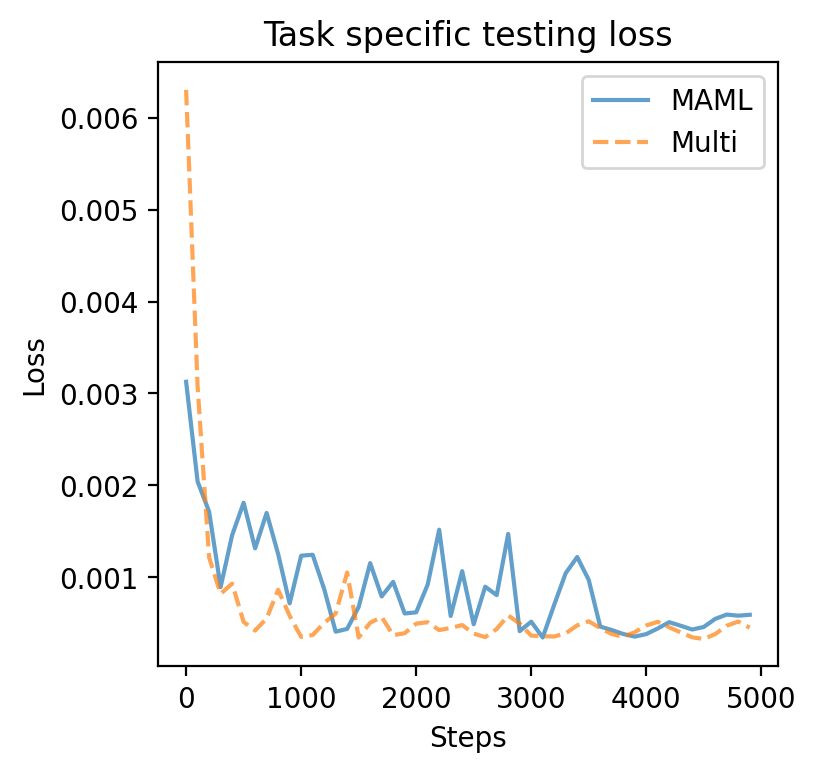

In [66]:
plt.figure(figsize=(4,4))
plt.plot(np.arange(1,5001,100),[float(i) for i in string_meta.split()[4::8]],alpha = 0.7)
plt.plot(np.arange(1,5001,100),[float(i) for i in string_multi.split()[4::8]],alpha = 0.7,ls='--')
plt.legend(['MAML','Multi'])
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Task specific testing loss')

(0.005, 0.025)

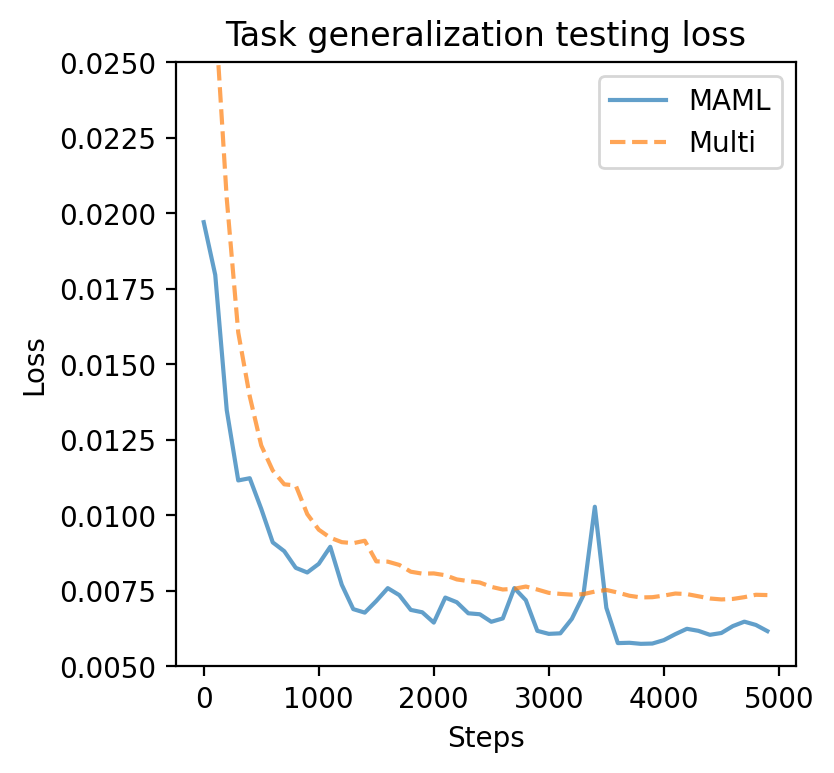

In [69]:
plt.figure(figsize=(4,4))
plt.plot(np.arange(1,5001,100),[float(i) for i in string_meta.split()[7::8]],alpha = 0.7)
plt.plot(np.arange(1,5001,100),[float(i) for i in string_multi.split()[7::8]],alpha = 0.7,ls='--')
plt.legend(['MAML','Multi'])
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Task generalization testing loss')
plt.ylim(0.005,0.025)